In [1]:
from sklearn import datasets    
import numpy as np         
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### Get Dataset

In [2]:
iris = datasets.load_iris()      
data = iris.data                 
target = iris.target             

shape = data.shape             


data = np.array(data).reshape(shape[0],shape[1])
target = np.array(target).reshape(shape[0],1)

print('dataset has {} examples each containing {} features '.format(data.shape[0],data.shape[1]))
print('Number of target values: ', target.shape[0])

dataset has 150 examples each containing 4 features 
Number of target values:  150


(0.0, 60.0)

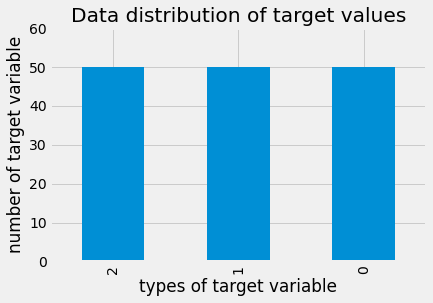

In [10]:
#checking wether the dataset is balanced or not
pd.Series(np.squeeze(target)).value_counts().plot(kind='bar',title= 'Data distribution of target values')
plt.xlabel('types of target variable')
plt.ylabel('number of target variable')
plt.ylim(0,60)

In [4]:
# Defining parameters and Hyperparameters
# number of of hidden layers: 1
# number of intital units in hidden layer: 8
# number of output units: 3
# number of input units: 4

In [5]:

num_classes = len(np.unique(target))

# number of features
input_units  = 4   

# number of units in hidden layer
hidden_units = 8  

#number of outputs in last layer
output_units = 3   

#define hyper-parameters
learning_rate = 0.03

#regularization parameter in case overfitting
beta = 0.00001

#num of iterations
iters = 4001

### Dimesions of Parameters
Shape of W0 (Wxh) = (4,8)  <br>
Shape of layer1_biasess (Bh) = (8,1)  <br>
Shape of W1 (Why) = (8,3)  <br>
Shape of layer2_biasess (By) = (3,1)  <br>

In [6]:
#PARAMETERS

def initialize_parameters(train_dataset):
    input_units= train_dataset.shape[1]
    hidden_units=  8
    mean = 0       
    std = 0.03      
    
    W0 = np.random.normal(mean,std,(input_units,hidden_units))          
    layer1_biases = np.ones((hidden_units,1))                                       
    W1 = np.random.normal(mean,std,(hidden_units,output_units))
    layer2_biases = np.ones((output_units,1))
    
    parameters = dict()
    parameters['W0'] = W0
    parameters['layer1_biases'] = layer1_biases
    parameters['W1'] = W1
    parameters['layer2_biases'] = layer2_biases
    
    return parameters


In [7]:
def sigmoid(X):
    return 1/(1+np.exp((-1)*X))


def softmax(X):
    exp_X = np.exp(X)
    exp_X_sum = np.sum(exp_X,axis=1).reshape(-1,1)
    exp_X = (exp_X/exp_X_sum)
    return exp_X

In [8]:

def forward_propagation(train_dataset,parameters):
    cache = dict()          
    m = len(train_dataset)    
    

    W0 = parameters['W0']
    layer1_biases = parameters['layer1_biases']
    W1 = parameters['W1']
    layer2_biases = parameters['layer2_biases']
    
    #forward prop
    Z1 = np.matmul(train_dataset,W0) + layer1_biases.T
    A1 = np.array(sigmoid(Z1)).reshape(m,hidden_units)
    A2 = np.array(np.matmul(A1,W1) + layer2_biases.T).reshape(m,output_units)
    output = np.array(softmax(A2)).reshape(m,num_classes)
    
    #fill in the cache
    cache['output'] = output
    cache['A1'] = A1
    
    return cache,output

#backward propagation
def backward_propagation(train_dataset,train_labels,parameters,cache):
    derivatives = dict()         #to store the derivatives
    
    #get stuff from cache
    output = cache['output']
    A1 = cache['A1']
    
    #get parameters
    W0 = parameters['W0']
    W1 = parameters['W1']
    
    #calculate errors
    error_output = output - train_labels
    error_A1 = np.matmul(error_output,W1.T)
    error_A1 = np.multiply(error_A1,A1)
    error_A1 = np.multiply(error_A1,1-A1)
    
    
    #calculate partial derivatives
    partial_derivatives2 = np.matmul(A1.T,error_output)/len(train_dataset)
    partial_derivatives1 = np.matmul(train_dataset.T,error_A1)/len(train_dataset)
    
    #store the derivatives
    derivatives['partial_derivatives1'] = partial_derivatives1
    derivatives['partial_derivatives2'] = partial_derivatives2
    
    return derivatives


#update the parameters
def update_parameters(derivatives,parameters):
    #get the parameters
    W0 = parameters['W0']
    W1 = parameters['W1']
    
    #get the derivatives
    partial_derivatives1 = derivatives['partial_derivatives1']
    partial_derivatives2 = derivatives['partial_derivatives2']
    
    #update the derivatives
    W0 -= (learning_rate*(partial_derivatives1 + beta*W0))
    W1 -= (learning_rate*(partial_derivatives2 + beta*W1))
    
    #update the dict
    parameters['W0'] = W0
    parameters['W1'] = W1
    
    return parameters
    
#calculate the loss and accuracy
def cal_loss_accuray(train_labels,predictions,parameters):
    #get the parameters
    W0 = parameters['W0']
    W1 = parameters['W1']
    
    #cal loss and accuracy
    loss = -1*np.sum(np.multiply(np.log(predictions),train_labels) + np.multiply(np.log(1-predictions),(1-train_labels)))/len(train_labels) + np.sum(W0**2)*beta/len(train_labels) + np.sum(W1**2)*beta/len(train_labels)
    accuracy = np.sum(np.argmax(train_labels,axis=1)==np.argmax(predictions,axis=1))
    accuracy /= len(train_dataset)
    
    return loss,accuracy

In [9]:
def train(train_dataset,train_labels,iters=2):
    J = []
    Acc=[]
    global W0
    global layer1_biases
    global W1
    global layer2_biases
  

    parameters = initialize_parameters(train_dataset)
    W0 = parameters['W0']
    layer1_biases = parameters['layer1_biases']
    W1 = parameters['W1']
    layer2_biases = parameters['layer2_biases']
    
    final_output = []
    
    for j in range(iters):

        cache,output = forward_propagation(train_dataset,parameters)


        derivatives = backward_propagation(train_dataset,train_labels,parameters,cache)
        

        loss,accuracy = cal_loss_accuray(train_labels,output,parameters)
        

        parameters = update_parameters(derivatives,parameters)

        J.append(loss)
        Acc.append(accuracy)
        final_output = output

        if(j%500==0):
            print('Iteration :',j, 'Accuracy :',accuracy*100, 'with loss :',loss)
        fit_p= {'W1':W0,'B1':layer1_biases}
    return Acc,J,final_output,parameters

In [10]:

z = list(zip(data,target))
np.random.shuffle(z)
data,target = zip(*z)

train_dataset = np.array(data).reshape(-1,4)
train_labels = np.zeros([train_dataset.shape[0],num_classes])
#one-hot encoding
for i,label in enumerate(target):
    train_labels[i,label] = 1

In [11]:
#normalization
for i in range(input_units):
    mean = train_dataset[:,i].mean()
    std = train_dataset[:,i].std()
    train_dataset[:,i] = (train_dataset[:,i]-mean)/std

In [12]:
# accuracy,J,final_output,P = train(train_dataset,train_labels,iters=5001)

In [13]:
# X= pd.DataFrame(train_dataset)
# Y= pd.Series([f for f in train_labels])
# to unpack Y
# print(np.array([z for z in Y]).shape)

from sklearn.model_selection import train_test_split
train_x,val_x,train_y1,val_y1= train_test_split(train_dataset, train_labels)
train_y= np.array([z for z in train_y1])
val_y= np.array([v for v in val_y1])


In [14]:
accuracy,loss,J,P= train(train_x,train_y,iters=5001)

Iteration : 0 Accuracy : 22.666666666666664 with loss : 1.9094662929966546
Iteration : 500 Accuracy : 51.33333333333333 with loss : 1.6457457053587798
Iteration : 1000 Accuracy : 70.0 with loss : 0.8444501564291123
Iteration : 1500 Accuracy : 70.0 with loss : 0.6026206560696186
Iteration : 2000 Accuracy : 71.33333333333334 with loss : 0.4772404989435196
Iteration : 2500 Accuracy : 71.33333333333334 with loss : 0.39517656963756076
Iteration : 3000 Accuracy : 71.33333333333334 with loss : 0.3367372134344139
Iteration : 3500 Accuracy : 71.33333333333334 with loss : 0.2950251461290713
Iteration : 4000 Accuracy : 72.0 with loss : 0.2651421709703325
Iteration : 4500 Accuracy : 72.0 with loss : 0.24323863498303452
Iteration : 5000 Accuracy : 72.0 with loss : 0.22666289016217436


In [15]:
def predict(train_dataset,parameters):
    cache,output = forward_propagation(train_dataset,parameters)
    return [list(x).index(max(x)) for x in output]

# actual=[list(x).index(max(x)) for x in val_y]
# Ot= predict(val_x,P)

# loss,accuracy= cal_loss_accuray(val_y,Ot,P)
# print(loss, accuracy*100)